In [14]:
from tracemalloc import Snapshot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import glob
import os


us_youtube_df = pd.read_csv('../data/USvideos.csv')
us_youtube_df.sample(5)



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
12749,OQkfDJ2zVNo,18.18.01,Trump Calls Non-White Countries S**tholes: The...,The Daily Show with Trevor Noah,23,2018-01-12T04:30:00.000Z,"the daily show|""trevor noah""|""daily show with ...",4089878,63682,20515,33355,https://i.ytimg.com/vi/OQkfDJ2zVNo/default.jpg,False,False,False,"During a White House meeting on immigration, P..."
8010,fFSmOE0Uxms,17.24.12,MAKING A GINGERBREAD TRAIN,Marzia,22,2017-12-23T18:00:11.000Z,"marzia|""cutiepie""|""cutiepiemarzia""|""pie""|""cute...",223060,28635,191,1943,https://i.ytimg.com/vi/fFSmOE0Uxms/default.jpg,False,False,False,Happy Holidays marzipans! Felix and I attempte...
16423,wJJqGh2HLM8,18.06.02,Hope Detector | Hyundai NFL Super Bowl LII,HyundaiUSA,2,2018-02-04T23:31:40.000Z,"Hyundai|""Hyundai Super Bowl""|""Hyundai surprise...",1946367,670,1679,241,https://i.ytimg.com/vi/wJJqGh2HLM8/default.jpg,False,False,False,What if metal detectors detected something mor...
2948,CWrjDoEBQsw,17.28.11,How To Make A THANKSGIVING ROAST HAM Out Of Pi...,How To Cake It,26,2017-11-21T15:59:21.000Z,"Google|""YouTube""|""Yolanda Gampp""|""Yolanda Gamp...",612653,23052,301,2125,https://i.ytimg.com/vi/CWrjDoEBQsw/default.jpg,False,False,False,SUBSCRIBE For New Vids - http://bit.ly/HowToCa...
39002,9jRtpMKLsts,18.05.06,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",The Official Pokémon YouTube channel,20,2018-05-30T01:22:17.000Z,"Pokémon|""Pokemon""|""Pokémon Let's Go""|""Pokémon ...",8727824,219541,23800,57406,https://i.ytimg.com/vi/9jRtpMKLsts/default.jpg,False,False,False,Return to the Kanto region and experience a cl...


In [ ]:
# Identify top 10 key influencers
# correlating publish time and views to determine most popular time for viewing content
# correlating/counting views, likes, dislikes, comments
# add csv for titles of youtube video id

In [44]:
#Who are the top 10 users based off likes.

sort_by_likes = us_youtube_df[['channel_title', 'likes']].sort_values('likes', ascending=False)
sort_by_likes.sample(10)


,channel_title,likes
34851,TED-Ed,12485
12681,WIRED,4057
6214,jacksfilms,157163
40596,Liza Koshy,284391
37170,JenniferLopezVEVO,205825
23864,Ben Katz,24737
28696,Wassabi Productions,108804
20998,Gentle Whispering ASMR,17323
2979,BehindTheSounds,469
13225,RemyMaVEVO,12067


In [74]:
popular_by_likes = (
    sort_by_likes
        .groupby(by='channel_title')
        .sum()
        .sort_values(by='likes', ascending=False)
        .head(10)
    )
popular_by_likes


,likes
channel_title,
ibighit,199247121
ChildishGambinoVEVO,96700818
Dude Perfect,60275557
Marvel Entertainment,55873344
ArianaGrandeVevo,52170970
jypentertainment,44900910
TaylorSwiftVEVO,39292840
Ed Sheeran,39279211
ZaynVEVO,31695245


In [53]:
#Who are the top 10 users based off likes.

sort_by_views = us_youtube_df[['channel_title', 'views']].sort_values('views', ascending=False)
sort_by_likes.sample(10)

,channel_title,likes
11168,Piece Of Me Tour Planet Hollywood,4491
16130,Science Magazine,1193
4035,Billboard,112354
35787,The Late Late Show with James Corden,8380
18789,Cobra Kai,20385
40510,Mr. Kate,74591
17145,FBE,128906
3459,Munchies,20516
28839,UFC ON FOX,3397
32155,Fortnite,74501


In [72]:
popular_by_views = (
    sort_by_views
        .groupby(by=['channel_title'])
        .sum()
        .sort_values(by='views', ascending=False)
        .head(10)
    )

popular_by_views



,views
channel_title,
ChildishGambinoVEVO,3758488765
ibighit,2235906679
Dude Perfect,1870085178
Marvel Entertainment,1808998971
ArianaGrandeVevo,1576959172
MalumaVEVO,1551515831
jypentertainment,1486972132
Sony Pictures Entertainment,1432374398
FoxStarHindi,1238609854


<AxesSubplot:ylabel='channel_title'>

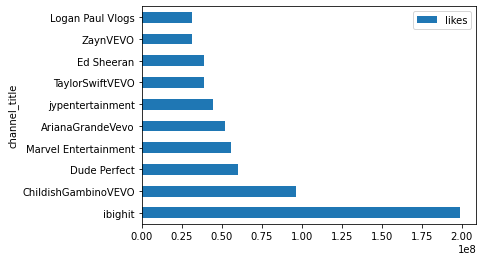

In [78]:
popular_by_likes.plot(kind='barh')

<AxesSubplot:ylabel='channel_title'>

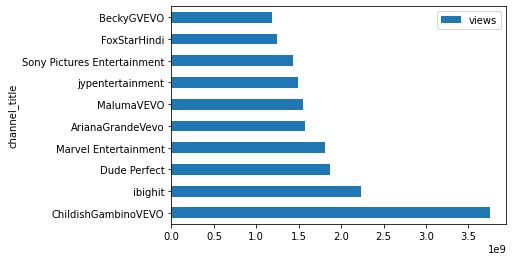

In [79]:
popular_by_views.plot(kind='barh')